# Import libraries

In [2]:
# Data preparation
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import re

# Data visualization
import matplotlib.pyplot as plt

# Data preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

# Model building -> Naive Bayes#1
import nltk
import collections
import nltk.metrics

# Model building -> Naive Bayes#2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

# Model building -> Random Forest#3
from sklearn.ensemble import RandomForestClassifier

# Model building -> SVMt#3
from sklearn import svm

# Saving model 
import pickle

# Data Preparation #1 (Filtering)

### Read csv file

In [5]:
data = pd.read_csv('245_1.csv')
data.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


### Check dataset information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

### Drop Unnecessary Columns

In [7]:
data_drop = data.drop(['id', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturerNumber', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.id', 'reviews.title', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'], axis=1)

### Check for missing values

In [8]:
data_drop.isnull()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
71039,False,False,False,False,False,False,False,False,False
71040,False,False,False,False,False,False,False,False,False
71041,False,False,False,False,False,False,False,False,False
71042,False,False,False,False,True,False,False,False,False


### Drop rows with one or more than one missing values

In [9]:
data_miss = data_drop.dropna()

### Check if new dataframe has any missing values

In [10]:
data_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6309 entries, 35 to 71041
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                6309 non-null   object 
 1   categories           6309 non-null   object 
 2   manufacturer         6309 non-null   object 
 3   name                 6309 non-null   object 
 4   reviews.didPurchase  6309 non-null   object 
 5   reviews.doRecommend  6309 non-null   object 
 6   reviews.numHelpful   6309 non-null   float64
 7   reviews.rating       6309 non-null   int64  
 8   reviews.text         6309 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 492.9+ KB


### Rename dataframe columns

In [11]:
data_miss.columns = ['brand', 'category', 'manufacturer', 'product name', 'purchased', 'recommended', 'helpful', 'rating', 'review']
data_miss.head()

,brand,category,manufacturer,product name,purchased,recommended,helpful,rating,review
35,J.R. Watkins,"Personal Care,Skin Care,Hand Cream,Beauty,Body...",J.R. Watkins,"J.R. Watkins Hand Cream, Lemon Cream",True,True,0.0,5,"I love this lotion. Nice and thick, great frag..."
36,AMBI,"Personal Care,Bath, Shower & Soap,Featured Bra...",FLEMING & CO,Ambi Complexion Cleansing Bar,True,True,3.0,4,Not sure how this works with clearing your com...
38,AMBI,"Personal Care,Bath, Shower & Soap,Featured Bra...",FLEMING & CO,Ambi Complexion Cleansing Bar,True,True,6.0,5,It makes my face feel nice and fresh. After ab...
39,AMBI,"Personal Care,Bath, Shower & Soap,Featured Bra...",FLEMING & CO,Ambi Complexion Cleansing Bar,True,True,1.0,5,I have used this soap for years and considered...
40,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",True,False,0.0,1,I WON'T recommend this product to anyone


# Exploratory Data Analysis

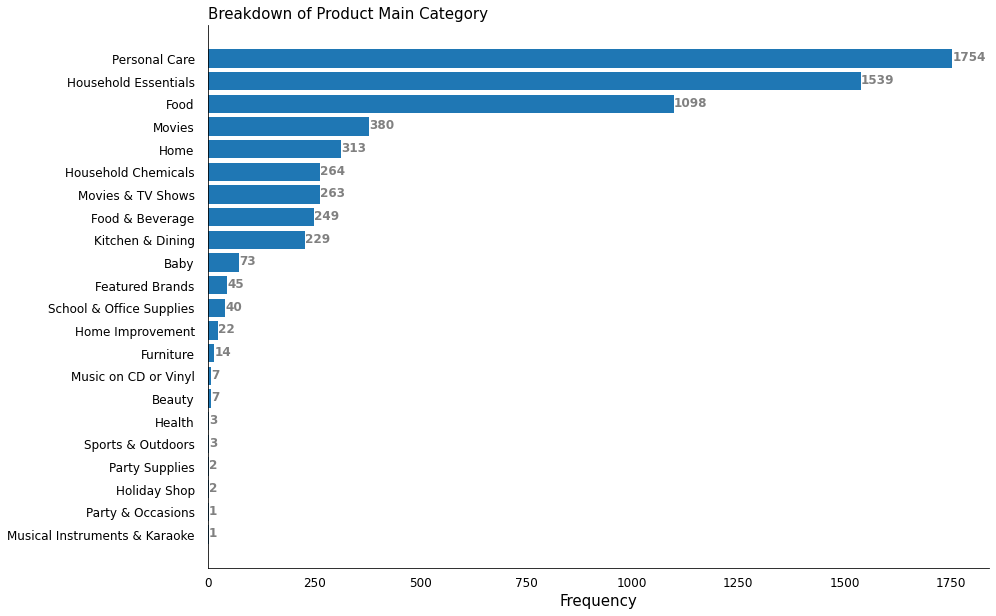

In [12]:
# Extract main category 
category_list = data_miss['category'].str.split(',', n=1, expand=True)
data_miss[['main category', 'subcategory']] = category_list
# display(data_miss)

# Plot bar chart for main category
# data_miss['category main type'].value_counts().plot(kind='bar')

# Set variables
category = data_miss['main category'].unique()
category = list(category)
frequency = data_miss['main category'].value_counts()
frequency = list(frequency)

# Set figure size
fig, ax = plt.subplots(figsize =(14, 10))

# Create horizontal bar plot
plt.barh(category, frequency) 

# Remove borders
for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
    
# Adjust font size of scales in x and y axis
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Show top main category values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold', color ='grey')
    
# Add title and x axis label
ax.set_title('Breakdown of Product Main Category', loc ='left', fontsize = 15)
plt.xlabel("Frequency", fontsize = 15)

# Show bar chart
plt.show()

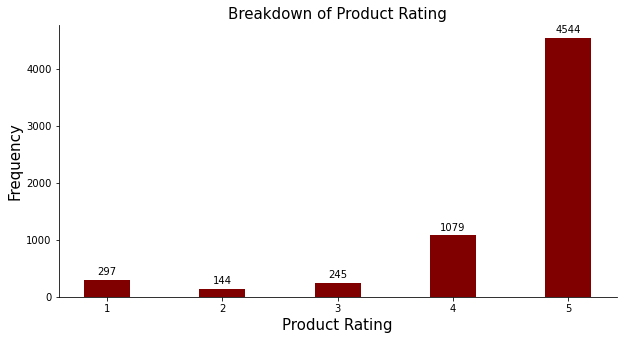

In [18]:
# Plot bar chart for rating
# Set variables
rating = list(data_miss['rating'].unique())
frequency = list(data_miss['rating'].value_counts())

# Set figure size
fig, ax = plt.subplots(figsize =(10, 5))

# Create bar plot
plt.bar(rating, frequency, color ='maroon', width = 0.4)

# Remove borders
for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Adjust font size of scales in x and y axis
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add annotation to bars
for i in ax.patches:
    ax.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2,
                i.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8), textcoords='offset points')

# Set labels
plt.xlabel("Product Rating", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Breakdown of Product Rating", fontsize = 15)
plt.show()

# Data Preparation #2 (Data Preprocessing)

In [13]:
data2 = data_miss.drop(['brand', 'product name', 'category', 'manufacturer', 'purchased', 'recommended', 'helpful', 'main category', 'subcategory'], axis=1)
data2.head()

,rating,review
35,5,"I love this lotion. Nice and thick, great frag..."
36,4,Not sure how this works with clearing your com...
38,5,It makes my face feel nice and fresh. After ab...
39,5,I have used this soap for years and considered...
40,1,I WON'T recommend this product to anyone


# Data Preprocessing

### Remove space & convert data into lowercase

In [14]:
data2['review'] = data_miss['review'].str.strip().str.lower()
data2

,rating,review
35,5,"i love this lotion. nice and thick, great frag..."
36,4,not sure how this works with clearing your com...
38,5,it makes my face feel nice and fresh. after ab...
39,5,i have used this soap for years and considered...
40,1,i won't recommend this product to anyone
...,...,...
71037,5,great item
71038,5,since i've starting wearing my contacts full-t...
71039,5,i'm dealing with dry eyes and very sensitive t...
71040,5,great stuff! helps keep my contacts moist all ...


### Remove contractions

In [15]:
# Convert review column to list
review_text = data2['review'].values.tolist()

# Function to remove contractions
def decontracted(review_text):
    # specific
    review_text = re.sub(r"won\'t", "will not", str(review_text))
    review_text = re.sub(r"can\'t", "can not", str(review_text))

    # general
    review_text = re.sub(r"n\'t", " not", str(review_text))
    review_text = re.sub(r"\'re", " are", str(review_text))
    review_text = re.sub(r"\'s", " is", str(review_text))
    review_text = re.sub(r"\'d", " would", str(review_text))
    review_text = re.sub(r"\'ll", " will", str(review_text))
    review_text = re.sub(r"\'t", " not", str(review_text))
    review_text = re.sub(r"\'ve", " have", str(review_text))
    review_text = re.sub(r"\'m", " am", str(review_text))
    return review_text

#print(decontracted(text))

# Create new column for reviews without contractions
data2['review without contractions'] = data2['review'].apply(decontracted)
data2

,rating,review,review without contractions
35,5,"i love this lotion. nice and thick, great frag...","i love this lotion. nice and thick, great frag..."
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh. after ab...
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone
...,...,...,...
71037,5,great item,great item
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...
71040,5,great stuff! helps keep my contacts moist all ...,great stuff! helps keep my contacts moist all ...


### Remove punctuation

In [16]:
data2['review without contractions'] = data2['review without contractions'].str.replace('[^\w\s]','', regex=True)
data2

,rating,review,review without contractions
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone
...,...,...,...
71037,5,great item,great item
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day


### Remove numbers

In [17]:
data2['review without contractions'] = data2['review without contractions'].str.replace('\d+', '', regex=True)
data2

,rating,review,review without contractions
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone
...,...,...,...
71037,5,great item,great item
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day


### Remove stopwords

In [18]:
# Combine stopwords from nltk and sckit-learn
stop = text.ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS = set(stopwords.words('english')).union(set(stop))

# Remove stopwords
data2['review without stopwords'] = data2['review without contractions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (ENGLISH_STOP_WORDS)]))
data2

,rating,review,review without contractions,review without stopwords
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...,love lotion nice great fragrance use hands feet
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...,sure works clearing complexion using weeks ski...
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...,makes face feel nice fresh days slight acne cl...
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...,used soap years considered walmart best kept s...
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone,recommend product
...,...,...,...,...
71037,5,great item,great item,great item
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...,starting wearing contacts fulltime instead tan...
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...,dealing dry eyes sensitive products eye clinic...
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day,great stuff helps contacts moist day


### Tokenize reviews

In [19]:
data2['review without stopwords'] = data2.apply(lambda row: nltk.word_tokenize(row['review without stopwords']), axis=1)
data2

,rating,review,review without contractions,review without stopwords
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...,"[love, lotion, nice, great, fragrance, use, ha..."
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...,"[sure, works, clearing, complexion, using, wee..."
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...,"[makes, face, feel, nice, fresh, days, slight,..."
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...,"[used, soap, years, considered, walmart, best,..."
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone,"[recommend, product]"
...,...,...,...,...
71037,5,great item,great item,"[great, item]"
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...,"[starting, wearing, contacts, fulltime, instea..."
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...,"[dealing, dry, eyes, sensitive, products, eye,..."
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day,"[great, stuff, helps, contacts, moist, day]"


### Perform lemmatization

In [20]:
# Download lexical database of NLTK
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()

data2['lemmatized tokens'] = data2['review without stopwords'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])
data2

[nltk_data] Downloading package wordnet to C:\Users\Loe Hui
[nltk_data]     Lin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,review,review without contractions,review without stopwords,lemmatized tokens
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...,"[love, lotion, nice, great, fragrance, use, ha...","[love, lotion, nice, great, fragrance, use, ha..."
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...,"[sure, works, clearing, complexion, using, wee...","[sure, work, clearing, complexion, using, week..."
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...,"[makes, face, feel, nice, fresh, days, slight,...","[make, face, feel, nice, fresh, day, slight, a..."
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...,"[used, soap, years, considered, walmart, best,...","[used, soap, year, considered, walmart, best, ..."
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone,"[recommend, product]","[recommend, product]"
...,...,...,...,...,...
71037,5,great item,great item,"[great, item]","[great, item]"
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...,"[starting, wearing, contacts, fulltime, instea...","[starting, wearing, contact, fulltime, instead..."
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...,"[dealing, dry, eyes, sensitive, products, eye,...","[dealing, dry, eye, sensitive, product, eye, c..."
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day,"[great, stuff, helps, contacts, moist, day]","[great, stuff, help, contact, moist, day]"


### Detokenize lemmatized tokens

In [22]:
to_detokenize = data2['lemmatized tokens'].values.tolist()

# Function to detokenize lemmatized tokens
def detokenize (to_detokenize):
    detokenized_list = " "
    for tokens in to_detokenize:
        detokenized_list = " ".join(str(tokens) for tokens in to_detokenize)
    return detokenized_list

# Create new column for detokenized reviews
data2['detokenized'] = data2['lemmatized tokens'].apply(detokenize)
data2

,rating,review,review without contractions,review without stopwords,lemmatized tokens,detokenized
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...,"[love, lotion, nice, great, fragrance, use, ha...","[love, lotion, nice, great, fragrance, use, ha...",love lotion nice great fragrance use hand foot
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...,"[sure, works, clearing, complexion, using, wee...","[sure, work, clearing, complexion, using, week...",sure work clearing complexion using week skin ...
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...,"[makes, face, feel, nice, fresh, days, slight,...","[make, face, feel, nice, fresh, day, slight, a...",make face feel nice fresh day slight acne clea...
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...,"[used, soap, years, considered, walmart, best,...","[used, soap, year, considered, walmart, best, ...",used soap year considered walmart best kept se...
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone,"[recommend, product]","[recommend, product]",recommend product
...,...,...,...,...,...,...
71037,5,great item,great item,"[great, item]","[great, item]",great item
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...,"[starting, wearing, contacts, fulltime, instea...","[starting, wearing, contact, fulltime, instead...",starting wearing contact fulltime instead tand...
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...,"[dealing, dry, eyes, sensitive, products, eye,...","[dealing, dry, eye, sensitive, product, eye, c...",dealing dry eye sensitive product eye clinic s...
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day,"[great, stuff, helps, contacts, moist, day]","[great, stuff, help, contact, moist, day]",great stuff help contact moist day


In [31]:
print(data2.head(100))

      rating                                             review  \
35         5  i love this lotion. nice and thick, great frag...   
36         4  not sure how this works with clearing your com...   
38         5  it makes my face feel nice and fresh. after ab...   
39         5  i have used this soap for years and considered...   
40         1           i won't recommend this product to anyone   
...      ...                                                ...   
1062       5  i thought the flavor and texture were very goo...   
1063       5  this product is absolutely amazing!! after rea...   
1064       5  love the kind bars for being organic, gluten f...   
1065       5   great snack and satisfies a taste for chocolate.   
1066       5  love these. non gmo and gluten free. they also...   

                            review without contractions  \
35    i love this lotion nice and thick great fragra...   
36    not sure how this works with clearing your com...   
38    it makes my 

### Add sentiment labels to dataset

In [23]:
# Sentiment labels (positive, negative, neutral) added to dataset based on rating
# Rating: 1, 2 -> Negative
# Rating: 3    -> Neutral
# Rating: 4, 5 -> Positive

def sentiment_label(rating):  
    if rating==1 or rating==2:
        return "negative" 
    elif rating==4 or rating==5:
        return "positive" 
    else:
        return "neutral"

data2['sentiment'] = data2['rating'].apply(sentiment_label)
data2
#data2.info()

,rating,review,review without contractions,review without stopwords,lemmatized tokens,detokenized,sentiment
35,5,"i love this lotion. nice and thick, great frag...",i love this lotion nice and thick great fragra...,"[love, lotion, nice, great, fragrance, use, ha...","[love, lotion, nice, great, fragrance, use, ha...",love lotion nice great fragrance use hand foot,positive
36,4,not sure how this works with clearing your com...,not sure how this works with clearing your com...,"[sure, works, clearing, complexion, using, wee...","[sure, work, clearing, complexion, using, week...",sure work clearing complexion using week skin ...,positive
38,5,it makes my face feel nice and fresh. after ab...,it makes my face feel nice and fresh after abo...,"[makes, face, feel, nice, fresh, days, slight,...","[make, face, feel, nice, fresh, day, slight, a...",make face feel nice fresh day slight acne clea...,positive
39,5,i have used this soap for years and considered...,i have used this soap for years and considered...,"[used, soap, years, considered, walmart, best,...","[used, soap, year, considered, walmart, best, ...",used soap year considered walmart best kept se...,positive
40,1,i won't recommend this product to anyone,i will not recommend this product to anyone,"[recommend, product]","[recommend, product]",recommend product,negative
...,...,...,...,...,...,...,...
71037,5,great item,great item,"[great, item]","[great, item]",great item,positive
71038,5,since i've starting wearing my contacts full-t...,since i have starting wearing my contacts full...,"[starting, wearing, contacts, fulltime, instea...","[starting, wearing, contact, fulltime, instead...",starting wearing contact fulltime instead tand...,positive
71039,5,i'm dealing with dry eyes and very sensitive t...,i am dealing with dry eyes and very sensitive ...,"[dealing, dry, eyes, sensitive, products, eye,...","[dealing, dry, eye, sensitive, product, eye, c...",dealing dry eye sensitive product eye clinic s...,positive
71040,5,great stuff! helps keep my contacts moist all ...,great stuff helps keep my contacts moist all day,"[great, stuff, helps, contacts, moist, day]","[great, stuff, help, contact, moist, day]",great stuff help contact moist day,positive


### Drop rows with neutral sentiments

In [24]:
data2.drop(data2[(data2['sentiment'] == "neutral")].index, inplace=True)
print(list(data2['sentiment'].unique()))
data2['sentiment'].value_counts()

['positive', 'negative']


positive    5623
negative     389
Name: sentiment, dtype: int64

# Save dataframe into csv file

In [32]:
data2.to_csv(r'C:\Users\Loe Hui Lin\Desktop\Year 3 Sem 2\Untitled Folder\classifier.csv', index = False, header=True)

# Visualization for new added columns

In [40]:
input2 = ['buyer beware taste like close expecting']
hello = cv.transform(input2)
print(hello)
nb.predict(hello)

  (0, 562)	1
  (0, 818)	1
  (0, 1118)	1
  (0, 2132)	1
  (0, 3497)	1
  (0, 6057)	1


array(['negative'], dtype='<U8')

In [31]:
# Graph for sentiment

In [32]:
# Graph for lemmatized tokens

# Feature Extraction (for first model draft)

In [33]:
# # Concactenate tokenized tokens into list
# all_tokens = data2['lemmatized tokens'].explode().to_list()
# # Print total number of tokens in corpus
# print("Total number of tokens in corpus: ", len(all_tokens))

# # Print total number of distinct tokens in corpus
# all_tokens = nltk.FreqDist(all_tokens)
# print("\nTotal number of distinct tokens in corpus: ", len(all_tokens))

# # Print top 10 most commonly occured tokens in corpus
# print("\nTop 10 most commonly occured tokens in corpus: ")
# all_tokens.tabulate(10)

# # Get first 2000 tokens with the most occurences as features 
# feature_list = list(all_tokens)[:2000]
# print("\n2000 selected tokens: ")
# print(feature_list)

# # Create a document (a list) of tokens and sentiment
# new_data = data2[['lemmatized tokens', 'sentiment']]
# new_data_list = new_data.values.tolist()
# print("\nDocument of lemmatized tokens and sentiment: ")
# print(new_data_list)

# # # Set random state
# # import random
# # random.shuffle(new_data_list)
# # print("\nRandomized document of lemmatized tokens and sentiment: ")
# # print(new_data_list)

# # Create feature extractor
# def feature_extractor(doc):
#     features = {}
#     for x in feature_list:
#         features[x] = x in doc
#     return features

# # Test if feature extractor function works as expected
# print("\nCalling feature_extractor function: ")
# print(feature_extractor(new_data_list[0][0]))

# # Access sentiment (items) in new_data_list
# sentiment_list = [subsentiment[1] for subsentiment in new_data_list]
# # print("\nSentiment list: ")
# # print(sentiment_list)

# # Store all features in feature_set
# feature_set = [(feature_extractor(doc), sentiment_list) for (doc, sentiment_list) in new_data_list]
# len(feature_set)

# Model Building (for first model draft)

### Split dataset into training and testing sets

In [34]:
# # Split into training set and testing set (previously 100)
# train_set, test_set = feature_set[1503:], feature_set[:1503]
# print("Length of train set: ", len(train_set))
# # print(train_set)

# print("Length of test set: ", len(test_set))
# # print(test_set)

### Train Naive Bayes classifier

In [35]:
# classifier = nltk.NaiveBayesClassifier.train(train_set)

# Model Evaluation (for first model draft)

### Evaluation metrics for Naive Bayes classifier

In [36]:
# nltk.classify.accuracy(classifier, test_set)

### Most informative features 

In [37]:
# classifier.show_most_informative_features(10)

# Feature Extraction Via CountVectorizer Library

In [25]:
# Define X and y to be passed to CountVectorizer to become a 2D matrix later
X = data2.detokenized
y = data2.sentiment
print(X.shape)
print(y.shape)

(6012,)
(6012,)


In [26]:
# Split X and y into training and testing sets
# by default, it splits 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4509,)
(1503,)
(4509,)
(1503,)


In [27]:
# Instantiate vectorizer
cv = CountVectorizer()

# Combine fit and transform training data into a single step
X_train_trans = cv.fit_transform(X_train)
X_train_trans

<4509x6898 sparse matrix of type '<class 'numpy.int64'>'
	with 58932 stored elements in Compressed Sparse Row format>

In [28]:
# Transform testing data (using fitted vocabulary) into a document-term matrix
X_test_trans = cv.transform(X_test)
X_test_trans

<1503x6898 sparse matrix of type '<class 'numpy.int64'>'
	with 18708 stored elements in Compressed Sparse Row format>

# Save Vectorizer via pickle

In [29]:
pickle.dump(cv, open("vectorizer.pickle", "wb"))

# #1: sklearn Naive Bayes model (Model Building + Model Evaluation)

In [36]:
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [37]:
# Train the model using X_train_trans
nb.fit(X_train_trans, y_train)

MultinomialNB()

In [38]:
# Make class predictions for X_test_trans
y_pred_class = nb.predict(X_test_trans)
y_pred_class

# # TESTING
# y_pred_class2 = nb.predict(X_train_trans)
# y_pred_class2

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [28]:
# Calculate NB2 accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

# # TESTING
# metrics.accuracy_score(y_train, y_pred_class2)

0.9461077844311377

In [29]:
# View NB2 confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

# # TESTING
# metrics.confusion_matrix(y_train, y_pred_class2)

array([[  23,   74],
       [   7, 1399]], dtype=int64)

In [30]:
# View NB2 classification report
print(classification_report(y_test, y_pred_class))

# # TESTING
# print(classification_report(y_train, y_pred_class2))

              precision    recall  f1-score   support

    negative       0.77      0.24      0.36        97
    positive       0.95      1.00      0.97      1406

    accuracy                           0.95      1503
   macro avg       0.86      0.62      0.67      1503
weighted avg       0.94      0.95      0.93      1503



In [31]:
# View review text for the false positives
X_test[y_pred_class > y_test]

51434          spray awful smell like hold good past smell
60929                                         like product
36909    product fine walmart packed shipping inside bo...
51441         average hair spray special hair sticky using
51416    received beauty box excited work hold odor spr...
                               ...                        
1324     excited sunless lotion cause lot bad review so...
4257     nice vacuum cleaner pile carpeting beater bar ...
51429    like smell fact spray output strong blew hairs...
6573     personal preference buy rice sticking morsel c...
18071    thing nice sheet patternthey hard poor quality...
Name: detokenized, Length: 74, dtype: object

In [32]:
# View review text for the false negatives
X_test[y_pred_class < y_test]

46600    purchased mainstay led lamp picked store lamp ...
32187    movie supposedly end adventure liveaction turt...
22186    cooky sandy cheek week school mshickok class t...
46419    good concealer chose wrong color mix foundatio...
22149    cookie review jayne class week tried cooky chi...
47514    using product large dark spot face dark circle...
46608    bought desk lamp office specific criterion min...
Name: detokenized, dtype: object

In [33]:
# Calculate predicted probabilities for X_test_trans (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_trans)[:, 1]
y_pred_prob

# # TESTING
# y_pred_prob2 = nb.predict_proba(X_train_trans)[:, 1]
# y_pred_prob2

array([0.99278201, 0.99996222, 0.99998386, ..., 0.9997472 , 0.99999999,
       0.98056796])

In [34]:
# View NB2 ROC AUC score
metrics.roc_auc_score(y_test, y_pred_prob)

# # TESTING
# metrics.roc_auc_score(y_train, y_pred_prob2)

0.7636894898153715

# Save sklearn Naive Bayes model via pickle

In [41]:
# # import the library
# import joblib

# set the output object name
filename = 'NBmodel.pickle'

# save model
pickle.dump(nb, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))
y_predicted = loaded_model.predict(X_test_trans)

1503

# #2: sklearn Random Forest model (Model Building + Model Evaluation)

In [ ]:
# Instantiate a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_trans, y_train)

In [ ]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test_trans)

In [ ]:
# Calculate RF accuracy score 
metrics.accuracy_score(y_test, y_pred_test)

In [ ]:
# View RF confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

In [ ]:
# View RF classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

In [ ]:
# View review text for the false positives
X_test[y_pred_test > y_test]

In [ ]:
# View review text for the false negatives
X_test[y_pred_test < y_test]

In [ ]:
# Calculate predicted probabilities for X_test_trans (poorly calibrated)
y_pred_prob = forest.predict_proba(X_test_trans)[:, 1]
y_pred_prob

In [ ]:
# View RF ROC AUC score
metrics.roc_auc_score(y_test, y_pred_prob)

In [ ]:
# # RF tuning example for future reference
# from  sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(
#                                 n_estimators=500, 
#                                 min_samples_leaf=2,
#                                 oob_score=True,
#                                 n_jobs=-1,
#                                 )
# forest.fit(X_test_trans,y_train)
# print(f"Train score: {forest.score(X_test_trans,y_train)}")
# print(f"OOB score: {forest.oob_score_}")

# #3: slearn Support Vector Machine model (Model Building + Model Evaluation)

In [ ]:
#import time
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
#t0 = time.time()
classifier_linear.fit(X_train_trans, y_train)
#t1 = time.time()
prediction_linear = classifier_linear.predict(X_test_trans)
#t2 = time.time()
#time_linear_train = t1-t0
#time_linear_predict = t2-t1
## results
#print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
# report = classification_report(y_train, prediction_linear, output_dict=True)
# print('positive: ', report['Positive'])
# print('negative: ', report['Negative'])

In [ ]:
# Calculate SVM accuracy score 
metrics.accuracy_score(y_test, prediction_linear)

In [ ]:
# View SVM confusion matrix
metrics.confusion_matrix(y_test, prediction_linear)

In [ ]:
# View SVM classification report
print(classification_report(y_test, prediction_linear))

In [ ]:
# View review text for the false positives
X_test[prediction_linear > y_test]

In [ ]:
# View review text for the false negatives
X_test[prediction_linear < y_test]

In [ ]:
# Calculate predicted probabilities for X_test_trans (poorly calibrated)
# y_pred_prob = svm.predict_proba(X_test_trans)[:, 1]
# y_pred_prob

In [ ]:
# View SVM ROC AUC score
# metrics.roc_auc_score(y_test, y_pred_prob)